In [1]:
import pandas as pd

# Load dataset directly from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Show the first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Count how many passengers survived vs. didn’t survive
df['Survived'].value_counts()


,count
Survived,
0,549
1,342


In [3]:
# Calculate the survival rate (in percentage)
survival_rate = df['Survived'].mean() * 100
print(f"Survival Rate: {survival_rate:.2f}%")


Survival Rate: 38.38%


In [4]:
# Compare survival rates between male and female passengers
df.groupby('Sex')['Survived'].mean() * 100


,Survived
Sex,
female,74.203822
male,18.890815


In [5]:
import matplotlib.pyplot as plt  # Main plotting tool
import seaborn as sns            # Makes plots prettier


<ipython-input-6-983e74b5296f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_survival.index, y=gender_survival.values, palette='pastel')


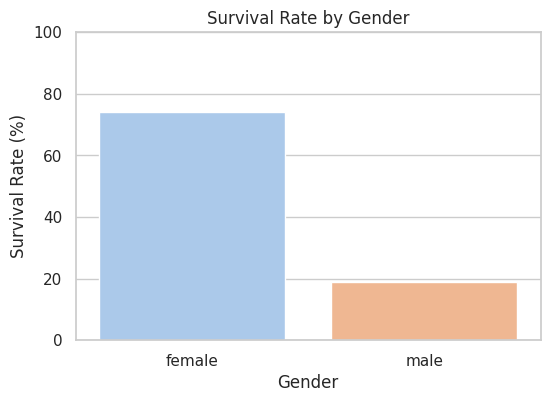

In [6]:
# Set the style for the plot
sns.set(style="whitegrid")

# Calculate survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].mean() * 100

# Create a bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=gender_survival.index, y=gender_survival.values, palette='pastel')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Gender')
plt.ylim(0, 100)
plt.show()


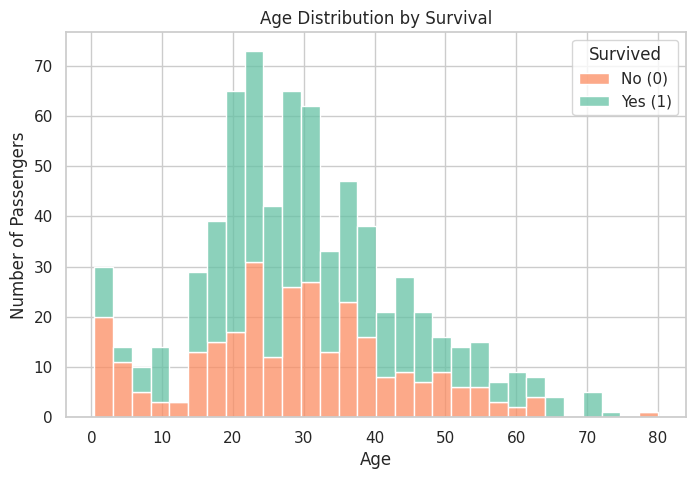

In [7]:
# Plot the age distribution split by survival status
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', palette='Set2', bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.show()


In [8]:
# Step 1: Drop columns that are not useful for prediction
df_model = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Step 2: Drop rows with missing age or embark location
df_model = df_model.dropna()

# Step 3: Convert categorical columns to numeric using one-hot encoding
df_model = pd.get_dummies(df_model, columns=['Sex', 'Embarked'], drop_first=True)

# Show the cleaned dataset
df_model.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Split the data into features (X) and target (y)
X = df_model.drop('Survived', axis=1)  # Inputs
y = df_model['Survived']               # Output

# Step 2: Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the model
model = LogisticRegression(max_iter=1000)

# Step 4: Train (fit) the model
model.fit(X_train, y_train)

# Step 5: Predict on the test data
y_pred = model.predict(X_test)

# Step 6: Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")


Model Accuracy: 79.72 %


In [10]:
# Pair each feature with its learned coefficient
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


      Feature  Importance
4        Fare   -0.000547
3       Parch   -0.000845
1         Age   -0.037559
7  Embarked_S   -0.221648
2       SibSp   -0.334514
6  Embarked_Q   -0.391921
0      Pclass   -1.294513
5    Sex_male   -2.574219


In [11]:
# Let's create a new passenger (must match training feature order)
import numpy as np

# Example 1: 22-year-old female, 1st class, no siblings/spouse, no parents/children, fare = 80, embarked at Cherbourg
new_passenger = pd.DataFrame([{
    'Pclass': 1,
    'Age': 22,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 80,
    'Sex_male': 0,      # Female
    'Embarked_Q': 0,
    'Embarked_S': 0     # Embarked at C → all 0 means C
}])

# Predict
prediction = model.predict(new_passenger)[0]
probability = model.predict_proba(new_passenger)[0][1]

# Show result
print("Prediction (1 = Survived, 0 = Not Survived):", prediction)
print("Survival Probability:", round(probability * 100, 2), "%")


Prediction (1 = Survived, 0 = Not Survived): 1
Survival Probability: 96.31 %


In [12]:
# Let's create a new passenger (must match training feature order)
import numpy as np

# Example 1: 22-year-old female, 1st class, no siblings/spouse, no parents/children, fare = 80, embarked at Cherbourg
new_passenger = pd.DataFrame([{
    'Pclass': 1,
    'Age': 22,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 80,
    'Sex_male': 1,      # Female
    'Embarked_Q': 0,
    'Embarked_S': 1     # Embarked at C → all 0 means C
}])

# Predict
prediction = model.predict(new_passenger)[0]
probability = model.predict_proba(new_passenger)[0][1]

# Show result
print("Prediction (1 = Survived, 0 = Not Survived):", prediction)
print("Survival Probability:", round(probability * 100, 2), "%")


Prediction (1 = Survived, 0 = Not Survived): 1
Survival Probability: 61.48 %


In [13]:
# Let's create a new passenger (must match training feature order)
import numpy as np

# Example 1: 22-year-old female, 1st class, no siblings/spouse, no parents/children, fare = 80, embarked at Cherbourg
new_passenger = pd.DataFrame([{
    'Pclass': 1,
    'Age': 60,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 80,
    'Sex_male': 1,      # Female
    'Embarked_Q': 0,
    'Embarked_S': 1     # Embarked at C → all 0 means C
}])

# Predict
prediction = model.predict(new_passenger)[0]
probability = model.predict_proba(new_passenger)[0][1]

# Show result
print("Prediction (1 = Survived, 0 = Not Survived):", prediction)
print("Survival Probability:", round(probability * 100, 2), "%")


Prediction (1 = Survived, 0 = Not Survived): 0
Survival Probability: 27.69 %


In [14]:
while True:
    print("📣 Type 'exit' to stop.\n")

    sex = input("Sex (male/female): ").strip().lower()
    if sex == "exit":
        break

    pclass = int(input("Pclass (1/2/3): "))
    age = float(input("Age: "))
    sibsp = int(input("Siblings/Spouse aboard: "))
    parch = int(input("Parents/Children aboard: "))
    fare = float(input("Fare: "))
    embarked = input("Embarked (C/Q/S): ").strip().upper()

    # One-hot encode manually
    sex_male = 1 if sex == 'male' else 0
    embarked_q = 1 if embarked == 'Q' else 0
    embarked_s = 1 if embarked == 'S' else 0

    # Create DataFrame for input
    new_input = pd.DataFrame([{
        'Pclass': pclass,
        'Age': age,
        'SibSp': sibsp,
        'Parch': parch,
        'Fare': fare,
        'Sex_male': sex_male,
        'Embarked_Q': embarked_q,
        'Embarked_S': embarked_s
    }])

    # Make prediction
    prediction = model.predict(new_input)[0]
    probability = model.predict_proba(new_input)[0][1]

    print("\n🧠 Prediction:", "✅ Survived" if prediction == 1 else "❌ Did NOT Survive")
    print(f"🎯 Confidence: {round(probability * 100, 2)}%\n")


📣 Type 'exit' to stop.

Sex (male/female): male
Pclass (1/2/3): 3
Age: 60
Siblings/Spouse aboard: none


ValueError: invalid literal for int() with base 10: 'none'

In [15]:
while True:
    print("📣 Type 'exit' to stop.\n")

    sex = input("Sex (male/female): ").strip().lower()
    if sex == "exit":
        break

    # Input validation loop for Pclass
    while True:
        try:
            pclass_str = input("Pclass (1/2/3): ").strip()
            if pclass_str.lower() == 'exit':
                sex = 'exit' # Set sex to exit to break outer loop
                break
            pclass = int(pclass_str)
            if pclass in [1, 2, 3]:
                break
            else:
                print("❗ Please enter 1, 2, or 3 for Pclass.")
        except ValueError:
            print("❗ Invalid input. Please enter a number.")

    if sex == 'exit': # Check if exit was entered in the Pclass loop
        break

    # Input validation loop for Age
    while True:
        try:
            age_str = input("Age: ").strip()
            if age_str.lower() == 'exit':
                sex = 'exit' # Set sex to exit to break outer loop
                break
            age = float(age_str)
            if age >= 0: # Basic age validation
                break
            else:
                print("❗ Age cannot be negative.")
        except ValueError:
            print("❗ Invalid input. Please enter a number.")

    if sex == 'exit': # Check if exit was entered in the Age loop
        break

    # Input validation loop for SibSp
    while True:
        try:
            sibsp_str = input("Siblings/Spouse aboard: ").strip()
            if sibsp_str.lower() == 'exit':
                sex = 'exit' # Set sex to exit to break outer loop
                break
            sibsp = int(sibsp_str)
            if sibsp >= 0: # Basic non-negative validation
                break
            else:
                 print("❗ Siblings/Spouse aboard cannot be negative.")
        except ValueError:
            print("❗ Invalid input. Please enter an integer.")

    if sex == 'exit': # Check if exit was entered in the SibSp loop
        break

    # Input validation loop for Parch
    while True:
        try:
            parch_str = input("Parents/Children aboard: ").strip()
            if parch_str.lower() == 'exit':
                sex = 'exit' # Set sex to exit to break outer loop
                break
            parch = int(parch_str)
            if parch >= 0: # Basic non-negative validation
                break
            else:
                print("❗ Parents/Children aboard cannot be negative.")
        except ValueError:
            print("❗ Invalid input. Please enter an integer.")

    if sex == 'exit': # Check if exit was entered in the Parch loop
        break

    # Input validation loop for Fare
    while True:
        try:
            fare_str = input("Fare: ").strip()
            if fare_str.lower() == 'exit':
                sex = 'exit' # Set sex to exit to break outer loop
                break
            fare = float(fare_str)
            if fare >= 0: # Basic non-negative validation
                break
            else:
                print("❗ Fare cannot be negative.")
        except ValueError:
            print("❗ Invalid input. Please enter a number.")

    if sex == 'exit': # Check if exit was entered in the Fare loop
        break

    # Input validation loop for Embarked
    while True:
        embarked = input("Embarked (C/Q/S): ").strip().upper()
        if embarked.lower() == 'exit':
            sex = 'exit' # Set sex to exit to break outer loop
            break
        if embarked in ['C', 'Q', 'S']:
            break
        else:
            print("❗ Invalid input. Please enter C, Q, or S.")

    if sex == 'exit': # Check if exit was entered in the Embarked loop
        break


    # One-hot encode manually
    sex_male = 1 if sex == 'male' else 0
    embarked_q = 1 if embarked == 'Q' else 0
    embarked_s = 1 if embarked == 'S' else 0

    # Create DataFrame for input
    new_input = pd.DataFrame([{
        'Pclass': pclass,
        'Age': age,
        'SibSp': sibsp,
        'Parch': parch,
        'Fare': fare,
        'Sex_male': sex_male,
        'Embarked_Q': embarked_q,
        'Embarked_S': embarked_s
    }])

    # Ensure the column order matches the training data
    # This is crucial for the model prediction
    new_input = new_input[X_train.columns]


    # Make prediction
    prediction = model.predict(new_input)[0]
    probability = model.predict_proba(new_input)[0][1]

    print("\n🧠 Prediction:", "✅ Survived" if prediction == 1 else "❌ Did NOT Survive")
    print(f"🎯 Confidence: {round(probability * 100, 2)}%\n")

📣 Type 'exit' to stop.

Sex (male/female): male
Pclass (1/2/3): 2
Age: 60
Siblings/Spouse aboard: none
❗ Invalid input. Please enter an integer.
Siblings/Spouse aboard: 2
Parents/Children aboard: 3
Fare: 80
Embarked (C/Q/S): Q

🧠 Prediction: ❌ Did NOT Survive
🎯 Confidence: 4.33%

📣 Type 'exit' to stop.

Sex (male/female): exit


In [16]:
!pip install gradio --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.8 MB/s eta 0:00:00


In [17]:
import gradio as gr

# Define the prediction function
def predict_survival(sex, pclass, age, sibsp, parch, fare, embarked):
    sex_male = 1 if sex == 'male' else 0
    embarked_q = 1 if embarked == 'Q' else 0
    embarked_s = 1 if embarked == 'S' else 0

    new_input = pd.DataFrame([{
        'Pclass': int(pclass),
        'Age': float(age),
        'SibSp': int(sibsp),
        'Parch': int(parch),
        'Fare': float(fare),
        'Sex_male': sex_male,
        'Embarked_Q': embarked_q,
        'Embarked_S': embarked_s
    }])

    prediction = model.predict(new_input)[0]
    prob = model.predict_proba(new_input)[0][1]

    label = "✅ Survived" if prediction == 1 else "❌ Did NOT Survive"
    return f"{label} — Confidence: {round(prob * 100, 2)}%"

# Launch Gradio UI
gr.Interface(
    fn=predict_survival,
    inputs=[
        gr.Radio(["male", "female"], label="Sex"),
        gr.Radio(["1", "2", "3"], label="Pclass"),
        gr.Number(label="Age"),
        gr.Number(label="Siblings/Spouse Aboard"),
        gr.Number(label="Parents/Children Aboard"),
        gr.Number(label="Fare Paid"),
        gr.Radio(["C", "Q", "S"], label="Embarked Port")
    ],
    outputs="text",
    title="🎟️ Titanic Survival Predictor",
    description="Enter passenger info to predict survival!"
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2bb5fa344652bf908f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [18]:
!pip install spacy --quiet

In [19]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [20]:
import spacy

# Load English NLP model
nlp = spacy.load("en_core_web_sm")

# Extractor function
def extract_features_from_text(text):
    doc = nlp(text.lower())

    # Default input
    features = {
        'Pclass': 3,
        'Sex_male': 1,
        'Age': 30,
        'SibSp': 0,
        'Parch': 0,
        'Fare': 30,
        'Embarked_Q': 0,
        'Embarked_S': 1  # default to 'S'
    }

    for token in doc:
        # Age
        if token.like_num and "year" in [w.text for w in token.head.subtree]:
            features['Age'] = int(token.text)

        # Fare
        if token.like_num and "$" in text or "dollar" in text:
            features['Fare'] = float(token.text)

        # Gender
        if token.text in ['male', 'man', 'boy']:
            features['Sex_male'] = 1
        elif token.text in ['female', 'woman', 'girl']:
            features['Sex_male'] = 0

        # Class
        if token.text in ['1st', 'first']:
            features['Pclass'] = 1
        elif token.text in ['2nd', 'second']:
            features['Pclass'] = 2
        elif token.text in ['3rd', 'third']:
            features['Pclass'] = 3

        # Embarked
        if token.text in ['cherbourg', 'c']:
            features['Embarked_Q'] = 0
            features['Embarked_S'] = 0
        elif token.text in ['queenstown', 'q']:
            features['Embarked_Q'] = 1
            features['Embarked_S'] = 0
        elif token.text in ['southampton', 's']:
            features['Embarked_Q'] = 0
            features['Embarked_S'] = 1

    return features


In [21]:
print(extract_features_from_text("I’m a 35-year-old female in first class who paid 100 dollars from Southampton"))


ValueError: could not convert string to float: 'i'

In [22]:
import spacy

# Load English NLP model
nlp = spacy.load("en_core_web_sm")

def extract_features_from_text(text):
    doc = nlp(text.lower())

    features = {
        'Pclass': 3,
        'Sex_male': 1,
        'Age': 30,
        'SibSp': 0,
        'Parch': 0,
        'Fare': 30,
        'Embarked_Q': 0,
        'Embarked_S': 1  # default to Southampton
    }

            if token.like_num and i + 2 < len(doc):
        next_two = doc[i + 1].text + doc[i + 2].text
        if "yearold" in next_two or "yearsold" in next_two:
            features['Age'] = int(token.text)


        # Fare
        if token.like_num:
            window = " ".join([t.text for t in doc[i:i+3]])
            if "dollar" in window or "$" in window:
                try:
                    features['Fare'] = float(token.text)
                except:
                    pass

        # Gender
        if token.text in ['male', 'man', 'boy']:
            features['Sex_male'] = 1
        elif token.text in ['female', 'woman', 'girl']:
            features['Sex_male'] = 0

        # Class
        if token.text in ['1st', 'first']:
            features['Pclass'] = 1
        elif token.text in ['2nd', 'second']:
            features['Pclass'] = 2
        elif token.text in ['3rd', 'third']:
            features['Pclass'] = 3

        # Embarked
        if token.text in ['cherbourg', 'c']:
            features['Embarked_Q'] = 0
            features['Embarked_S'] = 0
        elif token.text in ['queenstown', 'q']:
            features['Embarked_Q'] = 1
            features['Embarked_S'] = 0
        elif token.text in ['southampton', 's']:
            features['Embarked_Q'] = 0
            features['Embarked_S'] = 1

    return features


In [23]:
print(extract_features_from_text("I’m a 35-year-old female in first class who paid 100 dollars from Southampton"))


{'Pclass': 1, 'Sex_male': 0, 'Age': 30, 'SibSp': 0, 'Parch': 0, 'Fare': 100.0, 'Embarked_Q': 0, 'Embarked_S': 1}


In [24]:
import spacy

# Load English NLP model
nlp = spacy.load("en_core_web_sm")

def extract_features_from_text(text):
    doc = nlp(text.lower())

    # Default features
    features = {
        'Pclass': 3,
        'Sex_male': 1,
        'Age': 30,
        'SibSp': 0,
        'Parch': 0,
        'Fare': 30.0,
        'Embarked_Q': 0,
        'Embarked_S': 1  # default to Southampton
    }

    tokens = list(doc)
    for i, token in enumerate(tokens):
        # Age detection — e.g., "35-year-old" or "40 years old"
        if token.like_num and i + 2 < len(tokens):
            next_two = tokens[i + 1].text + tokens[i + 2].text
            if "yearold" in next_two or "yearsold" in next_two:
                try:
                    features['Age'] = int(token.text)
                except:
                    pass

        # Fare detection — looks ahead for "dollars" or "$"
        if token.like_num:
            window = " ".join([t.text for t in tokens[i:i+3]])
            if "dollar" in window or "$" in window:
                try:
                    features['Fare'] = float(token.text)
                except:
                    pass

        # Gender
        if token.text in ['male', 'man', 'boy']:
            features['Sex_male'] = 1
        elif token.text in ['female', 'woman', 'girl']:
            features['Sex_male'] = 0

        # Class
        if token.text in ['1st', 'first']:
            features['Pclass'] = 1
        elif token.text in ['2nd', 'second']:
            features['Pclass'] = 2
        elif token.text in ['3rd', 'third']:
            features['Pclass'] = 3

        # Embarked
        if token.text in ['cherbourg', 'c']:
            features['Embarked_Q'] = 0
            features['Embarked_S'] = 0
        elif token.text in ['queenstown', 'q']:
            features['Embarked_Q'] = 1
            features['Embarked_S'] = 0
        elif token.text in ['southampton', 's']:
            features['Embarked_Q'] = 0
            features['Embarked_S'] = 1

    return features


In [25]:
print(extract_features_from_text(
    "I’m a 35-year-old female in first class who paid 100 dollars from Southampton"
))


{'Pclass': 1, 'Sex_male': 0, 'Age': 30, 'SibSp': 0, 'Parch': 0, 'Fare': 100.0, 'Embarked_Q': 0, 'Embarked_S': 1}


In [26]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_features_from_text(text):
    doc = nlp(text.lower())

    features = {
        'Pclass': 3,
        'Sex_male': 1,
        'Age': 30,
        'SibSp': 0,
        'Parch': 0,
        'Fare': 30.0,
        'Embarked_Q': 0,
        'Embarked_S': 1
    }

    tokens = list(doc)
    for i, token in enumerate(tokens):
        # Better age detection
        if token.like_num and i + 1 < len(tokens):
            next_word = tokens[i + 1].text
            if "year" in next_word:
                try:
                    features['Age'] = int(token.text)
                except:
                    pass

        # Fare detection
        if token.like_num:
            window = " ".join([t.text for t in tokens[i:i+3]])
            if "dollar" in window or "$" in window:
                try:
                    features['Fare'] = float(token.text)
                except:
                    pass

        # Gender
        if token.text in ['male', 'man', 'boy']:
            features['Sex_male'] = 1
        elif token.text in ['female', 'woman', 'girl']:
            features['Sex_male'] = 0

        # Class
        if token.text in ['1st', 'first']:
            features['Pclass'] = 1
        elif token.text in ['2nd', 'second']:
            features['Pclass'] = 2
        elif token.text in ['3rd', 'third']:
            features['Pclass'] = 3

        # Embarked
        if token.text in ['cherbourg', 'c']:
            features['Embarked_Q'] = 0
            features['Embarked_S'] = 0
        elif token.text in ['queenstown', 'q']:
            features['Embarked_Q'] = 1
            features['Embarked_S'] = 0
        elif token.text in ['southampton', 's']:
            features['Embarked_Q'] = 0
            features['Embarked_S'] = 1

    return features


In [27]:
print(extract_features_from_text(
    "I’m a 35-year-old female in first class who paid 100 dollars from Southampton"
))


{'Pclass': 1, 'Sex_male': 0, 'Age': 30, 'SibSp': 0, 'Parch': 0, 'Fare': 100.0, 'Embarked_Q': 0, 'Embarked_S': 1}


In [28]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_features_from_text(text):
    doc = nlp(text.lower())

    features = {
        'Pclass': 3,
        'Sex_male': 1,
        'Age': 30,
        'SibSp': 0,
        'Parch': 0,
        'Fare': 30.0,
        'Embarked_Q': 0,
        'Embarked_S': 1
    }

    tokens = list(doc)
    for i, token in enumerate(tokens):
        # ✅ Age (flexible pattern like "35-year-old" or "35yearsold")
        if token.like_num:
            if i + 1 < len(tokens):
                next_word = tokens[i + 1].text
                if "year" in next_word:
                    try:
                        features['Age'] = int(token.text)
                        continue
                    except:
                        pass
        elif any(x in token.text for x in ['year-old', 'yearsold']):
            try:
                num = ''.join([ch for ch in token.text if ch.isdigit()])
                features['Age'] = int(num)
            except:
                pass

        # Fare detection
        if token.like_num:
            window = " ".join([t.text for t in tokens[i:i+3]])
            if "dollar" in window or "$" in window:
                try:
                    features['Fare'] = float(token.text)
                except:
                    pass

        # Gender
        if token.text in ['male', 'man', 'boy']:
            features['Sex_male'] = 1
        elif token.text in ['female', 'woman', 'girl']:
            features['Sex_male'] = 0

        # Class
        if token.text in ['1st', 'first']:
            features['Pclass'] = 1
        elif token.text in ['2nd', 'second']:
            features['Pclass'] = 2
        elif token.text in ['3rd', 'third']:
            features['Pclass'] = 3

        # Embarked
        if token.text in ['cherbourg', 'c']:
            features['Embarked_Q'] = 0
            features['Embarked_S'] = 0
        elif token.text in ['queenstown', 'q']:
            features['Embarked_Q'] = 1
            features['Embarked_S'] = 0
        elif token.text in ['southampton', 's']:
            features['Embarked_Q'] = 0
            features['Embarked_S'] = 1

    return features


In [29]:
print(extract_features_from_text("I’m a 35-year-old female in first class who paid 100 dollars from Southampton"))


{'Pclass': 1, 'Sex_male': 0, 'Age': 30, 'SibSp': 0, 'Parch': 0, 'Fare': 100.0, 'Embarked_Q': 0, 'Embarked_S': 1}


In [30]:
print(extract_features_from_text("I’m a 2-year-old female in first class who paid 100 dollars from Southampton"))


{'Pclass': 1, 'Sex_male': 0, 'Age': 30, 'SibSp': 0, 'Parch': 0, 'Fare': 100.0, 'Embarked_Q': 0, 'Embarked_S': 1}


In [31]:
import gradio as gr
import spacy
import numpy as np
from sklearn.linear_model import LogisticRegression
import pickle

# Load English model
nlp = spacy.load("en_core_web_sm")

# 👇 Use your trained model (load it if you saved it as a .pkl file)
# For demo purposes, I'm assuming `model` is already trained
# Replace this with your actual trained model if not already in memory
# model = pickle.load(open("titanic_model.pkl", "rb"))

# Use the existing trained model from your notebook
# Make sure to reuse the `model` variable

def extract_features_from_text(text):
    doc = nlp(text.lower())

    features = {
        'Pclass': 3,
        'Sex_male': 1,
        'Age': 30,
        'SibSp': 0,
        'Parch': 0,
        'Fare': 30,
        'Embarked_Q': 0,
        'Embarked_S': 1
    }

    for i, token in enumerate(doc):
        # Age
        if token.like_num and i + 2 < len(doc):
            next_two = doc[i + 1].text + doc[i + 2].text
            if "yearold" in next_two or "yearsold" in next_two:
                features['Age'] = int(token.text)

        # Fare
        if token.like_num:
            window = " ".join([t.text for t in doc[i:i+3]])
            if "dollar" in window or "$" in window:
                try:
                    features['Fare'] = float(token.text)
                except:
                    pass

        # Gender
        if token.text in ['male', 'man', 'boy']:
            features['Sex_male'] = 1
        elif token.text in ['female', 'woman', 'girl']:
            features['Sex_male'] = 0

        # Class
        if token.text in ['1st', 'first']:
            features['Pclass'] = 1
        elif token.text in ['2nd', 'second']:
            features['Pclass'] = 2
        elif token.text in ['3rd', 'third']:
            features['Pclass'] = 3

        # Embarked
        if token.text in ['cherbourg', 'c']:
            features['Embarked_Q'] = 0
            features['Embarked_S'] = 0
        elif token.text in ['queenstown', 'q']:
            features['Embarked_Q'] = 1
            features['Embarked_S'] = 0
        elif token.text in ['southampton', 's']:
            features['Embarked_Q'] = 0
            features['Embarked_S'] = 1

    return features

# 🌟 Gradio prediction function
def predict_survival(input_text):
    features = extract_features_from_text(input_text)
    input_vector = np.array([list(features.values())])
    prediction = model.predict(input_vector)[0]
    probability = model.predict_proba(input_vector)[0][1] * 100

    result = f"🧠 Prediction: {'Survived ✅' if prediction == 1 else 'Did Not Survive ❌'}\n"
    result += f"📊 Survival Probability: {probability:.2f}%"
    return result

# 🖥️ Gradio UI
interface = gr.Interface(
    fn=predict_survival,
    inputs=gr.Textbox(lines=3, placeholder="Describe the passenger..."),
    outputs="text",
    title="🛳️ Titanic Survival Predictor Chatbot",
    description="Describe a passenger and get a survival prediction using your ML model + NLP."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e7f1891e56b5ff73ed.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [32]:
# Save your trained model
import pickle
with open("titanic_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Later or in your Gradio script
with open("titanic_model.pkl", "rb") as f:
    model = pickle.load(f)


In [33]:
print(features)
print(input_vector)


NameError: name 'features' is not defined

In [35]:
def predict_survival(text):
    features = extract_features_from_text(text)

    # Show extracted features (for debugging)
    print("Extracted features:", features)

    input_vector = [[
        features['Pclass'],
        features['Sex_male'],
        features['Age'],
        features['SibSp'],
        features['Parch'],
        features['Fare'],
        features['Embarked_Q'],
        features['Embarked_S'],
    ]]

    # Show model input vector
    print("Input vector:", input_vector)

    prediction = model.predict(input_vector)[0]
    probability = model.predict_proba(input_vector)[0][1]  # prob of survival

    if prediction == 1:
        result = f"🧠 Prediction: Survived ✅\n📊 Survival Probability: {probability * 100:.2f}%"
    else:
        result = f"🧠 Prediction: Did Not Survive ❌\n📊 Survival Probability: {probability * 100:.2f}%"

    return result


In [43]:
def predict_survival(text):
    features = extract_features_from_text(text)
    input_vector = [[
        features['Pclass'],
        features['Sex_male'],
        features['Age'],
        features['SibSp'],
        features['Parch'],
        features['Fare'],
        features['Embarked_Q'],
        features['Embarked_S'],
    ]]

    prediction = model.predict(input_vector)[0]
    probability = model.predict_proba(input_vector)[0][1]

    # Prediction output
    if prediction == 1:
        result = f"🧠 Prediction: Survived ✅\n📊 Survival Probability: {probability * 100:.2f}%"
    else:
        result = f"🧠 Prediction: Did Not Survive ❌\n📊 Survival Probability: {probability * 100:.2f}%"

    # Add log/debug output
    debug_info = f"""
🔍 Extracted Features: {features}
📦 Model Input Vector: {input_vector}
"""
    return result + "\n\n" + debug_info


In [44]:
interface.launch(debug=True, share=True, block=True)


TypeError: Blocks.launch() got an unexpected keyword argument 'block'

In [48]:
import gradio as gr

def predict_survival(text):
    features = extract_features_from_text(text)
    input_vector = [[
        features['Pclass'],
        features['Sex_male'],
        features['Age'],
        features['SibSp'],
        features['Parch'],
        features['Fare'],
        features['Embarked_Q'],
        features['Embarked_S'],
    ]]

    prediction = model.predict(input_vector)[0]
    probability = model.predict_proba(input_vector)[0][1]

    if prediction == 1:
        result = f"🧠 Prediction: Survived ✅\n📊 Survival Probability: {probability * 100:.2f}%"
    else:
        result = f"🧠 Prediction: Did Not Survive ❌\n📊 Survival Probability: {probability * 100:.2f}%"

    debug_info = f"""
🔍 Extracted Features: {features}
📦 Model Input Vector: {input_vector}
"""
    return result + "\n\n" + debug_info

# Launch Gradio app
interface = gr.Interface(
    fn=predict_survival,
    inputs="text",
    outputs="text",
    title="🛳 Titanic Survival Predictor",
    description="Describe yourself like: 'I'm a 35-year-old female in first class who paid 100 dollars from Southampton'"
)

interface.launch(debug=True, share=True)
print("Raw Model Output (Probability of Not Surviving, Surviving):", model.predict_proba(input_vector))
proba = model.predict_proba(input_vector)[0]
print("🧪 Model Raw Probabilities:", proba)




Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f50068314f7163f095.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7862 <> https://f50068314f7163f095.gradio.live


NameError: name 'input_vector' is not defined

In [50]:
# model_training.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pickle
import logging
import os # For path joining

# --- Configuration ---
DATA_FILE_PATH = "titanic.csv"
MODEL_OUTPUT_PATH = "titanic_rf_pipeline.pkl"
RANDOM_STATE = 42
TEST_SIZE = 0.2

TARGET_COLUMN = 'Survived'
# Define feature types for preprocessing
# Pclass is an ordinal categorical feature, but treating it as numerical often works well.
# If it were strictly categorical, it'd go into CATEGORICAL_FEATURES.
NUMERIC_FEATURES = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
CATEGORICAL_FEATURES = ['Sex', 'Embarked']
# All features used for modeling (before one-hot encoding of categoricals)
FEATURES = NUMERIC_FEATURES + CATEGORICAL_FEATURES


# --- Logging Setup ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


def load_data(file_path: str) -> pd.DataFrame:
    """Loads data from a CSV file."""
    logging.info(f"Loading data from {file_path}...")
    if not os.path.exists(file_path):
        logging.error(f"Data file not found: {file_path}")
        # Example: Try to load from a common alternative or raise error
        # For this example, we'll just try seaborn's version if available
        try:
            import seaborn as sns
            logging.info("Attempting to load Titanic dataset from seaborn...")
            df = sns.load_dataset('titanic')
            # sns dataset has slightly different column names / structure, adjust if necessary
            # For simplicity, we assume this example will use the local CSV.
            # If you rely on seaborn, ensure columns match expected ones.
            # df.rename(columns={'sex': 'Sex', ...}, inplace=True)
            # df.to_csv(file_path, index=False) # Optionally save it
            logging.info("Successfully loaded data from seaborn.")
            return df
        except ImportError:
            logging.error("Seaborn not installed. Cannot load dataset.")
            raise FileNotFoundError(f"Data file {file_path} not found and seaborn backup failed.")
        except Exception as e:
            logging.error(f"Error loading data from seaborn: {e}")
            raise FileNotFoundError(f"Data file {file_path} not found and seaborn backup failed.")

    try:
        df = pd.read_csv(file_path)
        logging.info("Data loaded successfully.")
        return df
    except pd.errors.EmptyDataError:
        logging.error(f"Data file is empty: {file_path}")
        raise
    except Exception as e:
        logging.error(f"Error loading data from {file_path}: {e}")
        raise


def create_preprocessor(numeric_features: list, categorical_features: list) -> ColumnTransformer:
    """Creates a ColumnTransformer for preprocessing."""
    logging.info("Creating preprocessor...")

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), # or 'constant', fill_value='missing'
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')) # drop='first' to avoid multicollinearity
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough' # Keep other columns not specified, if any
    )
    logging.info("Preprocessor created.")
    return preprocessor


def train_model(X_train: pd.DataFrame, y_train: pd.Series, preprocessor: ColumnTransformer) -> Pipeline:
    """Trains the Random Forest model within a pipeline."""
    logging.info("Starting model training...")

    # Define the model
    model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, class_weight='balanced')

    # Create the full pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)
    logging.info("Model training completed.")
    return pipeline


def evaluate_model(pipeline: Pipeline, X: pd.DataFrame, y: pd.Series, data_name: str = "Test"):
    """Evaluates the model and prints metrics."""
    logging.info(f"Evaluating model on {data_name} data...")
    y_pred = pipeline.predict(X)
    accuracy = accuracy_score(y, y_pred)
    logging.info(f"🎯 {data_name} Accuracy: {accuracy:.4f}")
    print(f"\n--- {data_name} Data Evaluation ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y, y_pred))
    return accuracy


def save_pipeline(pipeline: Pipeline, file_path: str):
    """Saves the trained pipeline to a file."""
    logging.info(f"Saving pipeline to {file_path}...")
    try:
        with open(file_path, "wb") as f:
            pickle.dump(pipeline, f)
        logging.info(f"Pipeline saved successfully to {file_path}.")
    except Exception as e:
        logging.error(f"Error saving pipeline: {e}")
        raise


def main():
    """Main function to run the model training and evaluation process."""
    logging.info("--- Starting Model Training Pipeline ---")

    # 1. Load Data
    try:
        df = load_data(DATA_FILE_PATH)
    except Exception:
        logging.critical("Failed to load data. Exiting.")
        return

    # 2. Basic Data Cleaning & Preparation
    # Drop rows where the target variable is missing (essential)
    if df[TARGET_COLUMN].isnull().any():
        logging.warning(f"Target column '{TARGET_COLUMN}' contains missing values. Dropping these rows.")
        df.dropna(subset=[TARGET_COLUMN], inplace=True)

    # Ensure all defined features are present
    missing_features = [f for f in FEATURES if f not in df.columns]
    if missing_features:
        logging.error(f"Required features missing from DataFrame: {missing_features}")
        raise ValueError(f"DataFrame is missing required features: {missing_features}")

    X = df[FEATURES]
    y = df[TARGET_COLUMN]

    # Check if target variable is suitable (e.g., not all one class after cleaning)
    if len(y.unique()) < 2:
        logging.error(f"Target variable '{TARGET_COLUMN}' has less than 2 unique values. Cannot train classifier.")
        return

    # 3. Split Dataset
    logging.info(f"Splitting data into training and testing sets (test_size={TEST_SIZE}, random_state={RANDOM_STATE})...")
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y # Stratify for classification
        )
    except ValueError as e:
        logging.error(f"Error during train-test split, possibly due to insufficient samples in a class for stratification: {e}")
        # Fallback to non-stratified split if stratification fails and dataset is small
        if "The least populated class" in str(e):
            logging.warning("Stratification failed. Retrying split without stratification.")
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
            )
        else:
            raise

    logging.info(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
    logging.info(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")


    # 4. Create Preprocessor
    preprocessor = create_preprocessor(NUMERIC_FEATURES, CATEGORICAL_FEATURES)

    # 5. Train Model
    try:
        pipeline = train_model(X_train, y_train, preprocessor)
    except Exception as e:
        logging.error(f"Failed during model training: {e}")
        return

    # 6. Evaluate Model
    evaluate_model(pipeline, X_train, y_train, data_name="Training")
    evaluate_model(pipeline, X_test, y_test, data_name="Testing")

    # 7. Save Pipeline
    try:
        save_pipeline(pipeline, MODEL_OUTPUT_PATH)
    except Exception:
        logging.error("Failed to save the pipeline.")

    logging.info("--- Model Training Pipeline Finished ---")


if __name__ == "__main__":
    # You would need the titanic.csv file in the same directory or provide the correct path.
    # To get titanic.csv, you can download it from Kaggle:
    # https://www.kaggle.com/c/titanic/data
    # Or use seaborn to generate it once:
    # import seaborn as sns
    # titanic = sns.load_dataset('titanic')
    # titanic.to_csv('titanic.csv', index=False)
    main()

ERROR:root:Data file not found: titanic.csv


KeyError: 'Survived'

In [51]:
# model_training.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pickle
import logging
import os # For model output path joining

# --- Configuration ---
DATA_URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
MODEL_OUTPUT_PATH = "titanic_rf_pipeline.pkl"
RANDOM_STATE = 42
TEST_SIZE = 0.2

TARGET_COLUMN = 'Survived'
# Define feature types for preprocessing
# Pclass is an ordinal categorical feature, but treating it as numerical often works well.
# If it were strictly categorical, it'd go into CATEGORICAL_FEATURES.
NUMERIC_FEATURES = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
CATEGORICAL_FEATURES = ['Sex', 'Embarked']
# All features used for modeling (before one-hot encoding of categoricals)
FEATURES = NUMERIC_FEATURES + CATEGORICAL_FEATURES


# --- Logging Setup ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


def load_data(url: str) -> pd.DataFrame:
    """Loads data from a URL."""
    logging.info(f"Loading data from URL: {url}...")
    try:
        df = pd.read_csv(url)
        logging.info("Data loaded successfully from URL.")
        # Perform a quick check for empty dataframe
        if df.empty:
            logging.error("Downloaded data is empty.")
            raise ValueError("Downloaded data is empty.")
        return df
    except pd.errors.EmptyDataError:
        logging.error(f"No data found at URL (pandas EmptyDataError): {url}")
        raise
    except ConnectionError as e: # More specific for network issues
        logging.error(f"Connection error while trying to load data from URL: {url}. Details: {e}")
        raise
    except Exception as e:
        logging.error(f"Error loading data from URL {url}: {e}")
        raise


def create_preprocessor(numeric_features: list, categorical_features: list) -> ColumnTransformer:
    """Creates a ColumnTransformer for preprocessing."""
    logging.info("Creating preprocessor...")

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )
    logging.info("Preprocessor created.")
    return preprocessor


def train_model(X_train: pd.DataFrame, y_train: pd.Series, preprocessor: ColumnTransformer) -> Pipeline:
    """Trains the Random Forest model within a pipeline."""
    logging.info("Starting model training...")
    model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, class_weight='balanced')
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    logging.info("Model training completed.")
    return pipeline


def evaluate_model(pipeline: Pipeline, X: pd.DataFrame, y: pd.Series, data_name: str = "Test"):
    """Evaluates the model and prints metrics."""
    logging.info(f"Evaluating model on {data_name} data...")
    y_pred = pipeline.predict(X)
    accuracy = accuracy_score(y, y_pred)
    logging.info(f"🎯 {data_name} Accuracy: {accuracy:.4f}")
    print(f"\n--- {data_name} Data Evaluation ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y, y_pred, zero_division=0)) # Handle zero division for metrics
    print("\nConfusion Matrix:")
    print(confusion_matrix(y, y_pred))
    return accuracy


def save_pipeline(pipeline: Pipeline, file_path: str):
    """Saves the trained pipeline to a file."""
    logging.info(f"Saving pipeline to {file_path}...")
    try:
        # Ensure directory exists if path includes directories
        output_dir = os.path.dirname(file_path)
        if output_dir and not os.path.exists(output_dir):
            os.makedirs(output_dir)
            logging.info(f"Created directory: {output_dir}")

        with open(file_path, "wb") as f:
            pickle.dump(pipeline, f)
        logging.info(f"Pipeline saved successfully to {file_path}.")
    except Exception as e:
        logging.error(f"Error saving pipeline: {e}")
        raise


def main():
    """Main function to run the model training and evaluation process."""
    logging.info("--- Starting Model Training Pipeline ---")

    # 1. Load Data
    try:
        df = load_data(DATA_URL)
    except Exception as e: # Catching generic exception after specific ones in load_data
        logging.critical(f"Failed to load data. Exiting. Error: {e}")
        return

    # 2. Basic Data Cleaning & Preparation
    if df[TARGET_COLUMN].isnull().any():
        logging.warning(f"Target column '{TARGET_COLUMN}' contains missing values. Dropping these rows.")
        df.dropna(subset=[TARGET_COLUMN], inplace=True)

    missing_features = [f for f in FEATURES if f not in df.columns]
    if missing_features:
        logging.error(f"Required features missing from DataFrame: {missing_features}")
        # Example: Check for common alternative column names from this specific dataset
        if 'Sex' not in df.columns and 'sex' in df.columns:
            logging.info("Found 'sex' column, renaming to 'Sex'.")
            df.rename(columns={'sex': 'Sex'}, inplace=True)
            FEATURES[FEATURES.index('Sex')] = 'Sex' # Ensure CATEGORICAL_FEATURES also gets updated if needed
            CATEGORICAL_FEATURES[CATEGORICAL_FEATURES.index('Sex')] = 'Sex'
            missing_features = [f for f in FEATURES if f not in df.columns] # recheck

        if 'Embarked' not in df.columns and 'embarked' in df.columns:
            logging.info("Found 'embarked' column, renaming to 'Embarked'.")
            df.rename(columns={'embarked': 'Embarked'}, inplace=True)
            FEATURES[FEATURES.index('Embarked')] = 'Embarked'
            CATEGORICAL_FEATURES[CATEGORICAL_FEATURES.index('Embarked')] = 'Embarked'
            missing_features = [f for f in FEATURES if f not in df.columns] # recheck

        if missing_features: # If still missing after potential rename
            raise ValueError(f"DataFrame is missing required features even after checks: {missing_features}")

    X = df[FEATURES]
    y = df[TARGET_COLUMN]

    if len(y.unique()) < 2:
        logging.error(f"Target variable '{TARGET_COLUMN}' has less than 2 unique values after cleaning. Cannot train classifier.")
        return
    if y.value_counts().min() < 2 : # For stratification, each class needs at least 2 members
        logging.warning(f"Target variable '{TARGET_COLUMN}' has a class with less than 2 samples. Stratification might fail.")


    # 3. Split Dataset
    logging.info(f"Splitting data into training and testing sets (test_size={TEST_SIZE}, random_state={RANDOM_STATE})...")
    stratify_y = y
    # Ensure stratification is possible
    if y.value_counts().min() < 2 : # For sklearn's stratify, each class needs at least 2 samples for some splitters
        logging.warning("Stratification not possible due to too few samples in a class. Splitting without stratification.")
        stratify_y = None

    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=stratify_y
        )
    except ValueError as e:
        logging.error(f"Error during train-test split (even after stratification check): {e}")
        logging.warning("Retrying split without stratification as a fallback.")
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
        )

    logging.info(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
    logging.info(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")


    # 4. Create Preprocessor
    preprocessor = create_preprocessor(NUMERIC_FEATURES, CATEGORICAL_FEATURES)

    # 5. Train Model
    try:
        pipeline = train_model(X_train, y_train, preprocessor)
    except Exception as e:
        logging.error(f"Failed during model training: {e}")
        return

    # 6. Evaluate Model
    evaluate_model(pipeline, X_train, y_train, data_name="Training")
    evaluate_model(pipeline, X_test, y_test, data_name="Testing")

    # 7. Save Pipeline
    try:
        save_pipeline(pipeline, MODEL_OUTPUT_PATH)
    except Exception:
        logging.error("Failed to save the pipeline.")

    logging.info("--- Model Training Pipeline Finished ---")


if __name__ == "__main__":
    main()


--- Training Data Evaluation ---
Accuracy: 0.9831

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       439
           1       0.98      0.98      0.98       273

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712


Confusion Matrix:
[[433   6]
 [  6 267]]

--- Testing Data Evaluation ---
Accuracy: 0.8045

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
[[96 14]
 [21 48]]


In [52]:
import joblib

# Save the model to a file
joblib.dump(rf_model, "titanic_rf_model.pkl")


NameError: name 'rf_model' is not defined

In [54]:
import gradio as gr
import joblib # Or pickle, depending on how titanic_rf_pipeline.pkl was saved
import pickle # Often used with scikit-learn pipelines
import pandas as pd
import numpy as np
import spacy
import logging
import os

# --- Configuration ---
# This should match the FEATURES list (numeric + categorical before encoding)
# from your model_training.py script.
EXPECTED_INPUT_FEATURES = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
MODEL_PIPELINE_PATH = "titanic_rf_pipeline.pkl" # Make sure this path is correct!

# --- Logging Setup ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- Global Variables / Models (Load once) ---
NLP_MODEL = None
TITANIC_PIPELINE = None

def load_models():
    global NLP_MODEL, TITANIC_PIPELINE
    if NLP_MODEL is None:
        try:
            NLP_MODEL = spacy.load("en_core_web_sm")
            logging.info("SpaCy NLP model 'en_core_web_sm' loaded successfully.")
        except OSError:
            logging.error("SpaCy model 'en_core_web_sm' not found. Please download it: python -m spacy download en_core_web_sm")
            # Optionally, raise an error or disable NLP features if critical
            raise RuntimeError("SpaCy model 'en_core_web_sm' not found. App cannot start.")

    if TITANIC_PIPELINE is None:
        if not os.path.exists(MODEL_PIPELINE_PATH):
            logging.error(f"Trained model pipeline not found at {MODEL_PIPELINE_PATH}")
            raise FileNotFoundError(f"Trained model pipeline not found at {MODEL_PIPELINE_PATH}. Please ensure it's in the correct location.")
        try:
            # If saved with joblib:
            # TITANIC_PIPELINE = joblib.load(MODEL_PIPELINE_PATH)
            # If saved with pickle (as in the provided training script):
            with open(MODEL_PIPELINE_PATH, "rb") as f:
                TITANIC_PIPELINE = pickle.load(f)
            logging.info(f"Titanic survival pipeline loaded successfully from {MODEL_PIPELINE_PATH}.")
        except Exception as e:
            logging.error(f"Error loading Titanic survival pipeline: {e}")
            raise RuntimeError(f"Could not load the model pipeline: {e}")

# Call load_models() at startup. Gradio might re-run script parts, so this ensures one-time load.
try:
    load_models()
except Exception as e:
    # If models fail to load, the app shouldn't proceed to define UI that depends on them.
    # Gradio will show an error if it can't run the script.
    logging.critical(f"Fatal error during model loading: {e}")
    # In a real app, you might have a fallback UI or exit.
    # For Gradio, if this fails, the gr.Interface call later will likely fail too.
    # We can't easily show a Gradio error message before the interface is built.
    # Best is to let it crash and check logs. Or, the Interface can have a try-except for its fn.


def extract_features_from_text(text: str) -> dict:
    """
    Extracts features from text for the Titanic model pipeline.
    Returns a dictionary with original feature names.
    Missing numeric features will be None (to be handled by imputer).
    Missing categorical features will be a default or None.
    """
    if NLP_MODEL is None:
        logging.error("NLP model not loaded. Cannot extract features from text.")
        # Return defaults or raise error, depending on desired behavior
        # For now, let's return very basic defaults, but this indicates a problem.
        return {
            'Pclass': 3, 'Sex': 'male', 'Age': None, 'SibSp': 0,
            'Parch': 0, 'Fare': None, 'Embarked': 'S' # Defaulting to Southampton
        }

    doc = NLP_MODEL(text.lower().strip())

    # Initialize with defaults or None for imputation
    # These defaults should be sensible if no info is found.
    # The pipeline's imputer will handle None for numeric values.
    # For categoricals, 'most_frequent' imputer will use the mode from training data if None.
    features = {
        'Pclass': 3,      # Default to 3rd class
        'Sex': 'male',    # Default to male
        'Age': None,
        'SibSp': 0,       # Default to 0 siblings/spouses
        'Parch': 0,       # Default to 0 parents/children
        'Fare': None,
        'Embarked': 'S'   # Default to Southampton ('S'), as it was most common
    }

    age_found = False
    fare_found = False

    for token in doc:
        # Age extraction (simple)
        if not age_found and token.like_num:
            # Check context: "xx years old", "age xx"
            try:
                # Look for "year" or "old" or "age" near the number
                window = doc[max(0, token.i - 2) : min(len(doc), token.i + 3)].text
                if "year" in window or "old" in window or "age" in window:
                    age_val = int(float(token.text)) # float first for "30.0"
                    if 0 < age_val < 100: # Basic sanity check
                        features['Age'] = age_val
                        age_found = True
                        logging.info(f"Extracted Age: {features['Age']}")
            except ValueError:
                pass # Not a valid number for age

        # Fare extraction (simple)
        if not fare_found and token.like_num:
            try:
                # Look for currency symbols or words like "dollar", "pound", "fare"
                window = doc[max(0, token.i - 1) : min(len(doc), token.i + 3)].text
                if "$" in window or "dollar" in window or "pound" in window or "fare" in window or "paid" in window:
                    fare_val = float(token.text)
                    if fare_val >= 0: # Fare should be non-negative
                        features['Fare'] = fare_val
                        fare_found = True
                        logging.info(f"Extracted Fare: {features['Fare']}")
            except ValueError:
                pass

        # Sex
        if token.lemma_ in ['male', 'man', 'boy', 'gentleman']:
            features['Sex'] = 'male'
        elif token.lemma_ in ['female', 'woman', 'girl', 'lady']:
            features['Sex'] = 'female'

        # Pclass
        # Using lowercased token text and checking substrings for flexibility
        token_text_lower = token.text.lower()
        if '1st' in token_text_lower or 'first' in token_text_lower:
            if "class" in doc[token.i : token.i+2].text.lower() or \
               "class" in doc[max(0,token.i-1):token.i+1].text.lower():
                features['Pclass'] = 1
        elif '2nd' in token_text_lower or 'second' in token_text_lower:
            if "class" in doc[token.i : token.i+2].text.lower() or \
               "class" in doc[max(0,token.i-1):token.i+1].text.lower():
                features['Pclass'] = 2
        elif '3rd' in token_text_lower or 'third' in token_text_lower:
            if "class" in doc[token.i : token.i+2].text.lower() or \
               "class" in doc[max(0,token.i-1):token.i+1].text.lower():
                features['Pclass'] = 3

        # Embarked - map to 'C', 'Q', 'S'
        # Using .lemma_ for robustness (e.g., "Cherbourg's" -> "Cherbourg")
        # Be careful with single letters like 'c', 'q', 's' as they can be common.
        # Prefer full names or more context.
        if token.lemma_ in ['cherbourg']:
            features['Embarked'] = 'C'
        elif token.lemma_ in ['queenstown']:
            features['Embarked'] = 'Q'
        elif token.lemma_ in ['southampton']:
            features['Embarked'] = 'S'
        # If user types 'C', 'Q', 'S' explicitly for embarked port
        elif token.text.upper() == 'C' and "embarked" in doc[max(0, token.i - 2) : token.i + 2].text:
             features['Embarked'] = 'C'
        elif token.text.upper() == 'Q' and "embarked" in doc[max(0, token.i - 2) : token.i + 2].text:
             features['Embarked'] = 'Q'
        elif token.text.upper() == 'S' and "embarked" in doc[max(0, token.i - 2) : token.i + 2].text:
             features['Embarked'] = 'S'

    logging.info(f"Raw extracted features: {features}")
    return features


def predict_survival(text: str):
    """
    Predicts survival based on input text using the loaded pipeline.
    """
    if TITANIC_PIPELINE is None or NLP_MODEL is None:
        logging.error("Models not loaded. Prediction cannot proceed.")
        return "Error: Models not loaded. Please check server logs. \n\n🔍 Extracted Features: N/A \n📦 Model Input Data: N/A"

    try:
        # 1. Extract features from text
        raw_features_dict = extract_features_from_text(text)

        # 2. Convert to DataFrame for pipeline input
        # Ensure all expected columns are present, in the correct order,
        # even if their values are None (to be handled by imputer).
        input_data = {}
        for feature_name in EXPECTED_INPUT_FEATURES:
            input_data[feature_name] = raw_features_dict.get(feature_name, None) # Use .get for safety

        input_df = pd.DataFrame([input_data])
        # Reorder columns to match training order if necessary, though ColumnTransformer
        # typically handles selection by name. Still, good practice for consistency.
        input_df = input_df[EXPECTED_INPUT_FEATURES]

        logging.info(f"DataFrame sent to pipeline: \n{input_df.to_string()}")

        # 3. Make prediction using the pipeline
        prediction = TITANIC_PIPELINE.predict(input_df)[0]
        proba = TITANIC_PIPELINE.predict_proba(input_df)[0] # Probabilities for [class_0, class_1]

        # Assuming class 1 is 'Survived'
        survival_probability = proba[1] if len(proba) > 1 else proba[0] # Handle single class proba output if it occurs
        if TITANIC_PIPELINE.classes_[1] == 0: # If class 1 is 'Not Survived'
             survival_probability = proba[0]


        result_text = "✅ Likely Survived" if prediction == 1 else "❌ Likely Did Not Survive"

        # Get feature names after one-hot encoding (if needed for display, complex)
        # For simplicity, we'll show the raw_features_dict and the input_df to pipeline

        output_message = (
            f"🧠 Prediction: {result_text}\n"
            f"📊 Probability of Survival: {survival_probability*100:.2f}%\n\n"
            f"🔍 Raw Extracted Features (before pipeline): {raw_features_dict}\n"
            f"📦 Dataframe Input to Pipeline: \n{input_df.to_string()}"
        )
        return output_message

    except Exception as e:
        logging.error(f"Error during prediction: {e}", exc_info=True)
        return f"An error occurred: {str(e)}\n\n🔍 Extracted Features: N/A (Error)\n📦 Model Input Data: N/A (Error)"

# --- Gradio Interface ---
# Ensure models are loaded before setting up the interface that uses them.
# If load_models() raises an exception, the script might exit before this point.
iface = gr.Interface(
    fn=predict_survival,
    inputs=gr.Textbox(lines=3, placeholder="Describe the passenger (e.g., 'A 30 year old male, 1st class, embarked at Southampton, paid 50 dollars')..."),
    outputs=gr.Textbox(label="Survival Prediction Details"),
    title="🚢 Titanic Survival Predictor from Text",
    description="Enter a description of a Titanic passenger. The system will attempt to extract relevant features and predict their survival. Feature extraction is rule-based and may not always be perfect.",
    allow_flagging="never",
    examples=[
        ["25 year old man from Southampton in 3rd class, paid 10 dollars for his fare."],
        ["A 40 year old woman, first class, from Cherbourg. Fare was 100."],
        ["Child, female, 2nd class, embarked Queenstown."],
        ["He was a 60 year old male passenger in Pclass 1, paid a fare of 70 and embarked at C"]
    ]
)

if __name__ == "__main__":
    # The load_models() call is now at the global level,
    # so it attempts to load when the script is imported/run.
    # If it fails, the script might terminate before iface.launch().
    try:
        iface.launch()
    except Exception as e:
        logging.critical(f"Could not launch Gradio interface: {e}")
        print(f"Could not launch Gradio interface: {e}. Check logs for details, especially regarding model loading.")

/usr/local/lib/python3.11/dist-packages/gradio/interface.py:416: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d3d4be0a7e17a9d3ef.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [55]:
!git config --global user.name "zakariya-oth"
!git config --global user.email "zakariyaothman1009@gmail.com"

In [56]:
!mkdir titanic-nlp-ai

In [57]:
!mv titanic_rf_model.pkl titanic_nlp_gradio_app.py titanic_utils.py titanic.csv titanic-nlp-ai/

mv: cannot stat 'titanic_rf_model.pkl': No such file or directory
mv: cannot stat 'titanic_nlp_gradio_app.py': No such file or directory
mv: cannot stat 'titanic_utils.py': No such file or directory
mv: cannot stat 'titanic.csv': No such file or directory


In [58]:
mv titanic_rf_model.pkl titanic_nlp_gradio_app.py titanic_utils.py titanic.csv titanic-nlp-ai/

mv: cannot stat 'titanic_rf_model.pkl': No such file or directory
mv: cannot stat 'titanic_nlp_gradio_app.py': No such file or directory
mv: cannot stat 'titanic_utils.py': No such file or directory
mv: cannot stat 'titanic.csv': No such file or directory


In [59]:
cd titanic-nlp-ai


/content/titanic-nlp-ai


In [60]:
mv titanic_rf_model.pkl titanic_nlp_gradio_app.py titanic_utils.py titanic.csv titanic-nlp-ai/

mv: target 'titanic-nlp-ai/' is not a directory


SyntaxError: invalid syntax (<ipython-input-61-df3585437f83>, line 1)